In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 13,6

# Задание 1. Загрузите файл HR.csv в pandas dataframe

Признаки:

1. *satisfaction_level* - Уровень удовлетворенности работой
2. *Last_evaluation* - Время с момента последней оценки в годах
3. *number_projects* - Количество проектов, выполненных за время работы
4. *average_montly_hours* (опечатка в названии столбца в CSV) - Среднее количество часов на рабочем месте в месяц
5. *time_spend_company* - Стаж работы в компании в годах
6. *work_accident* - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. *left* - уволился ли сотрудник
8. *promotion_last_5years* - повышался ли сотрудник за последние пять лет
9. *department* - отдел в котором работает сотрудник
10. *salary* - относительный уровень зарплаты

In [2]:
df = pd.read_csv('HR.csv')

bool_categories = [0, 1]
# df['left'] = df['left'].astype('category')
# df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')
# df['Work_accident'] = df['Work_accident'].astype('category')

df['left'] = pd.Categorical(df['left'], categories = bool_categories)
df['promotion_last_5years'] = pd.Categorical(df['promotion_last_5years'], categories = bool_categories)
df['Work_accident'] = pd.Categorical(df['Work_accident'], categories = bool_categories)
df['salary'] = pd.Categorical(df['salary'], categories = ['low', 'medium', 'high'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  object  
 9   salary                 14999 non-null  category
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 762.2+ KB


In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# Задание 2. Рассчитайте основные статистики для переменных

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [5]:
# моды для категориальных
for column in ['left', 'promotion_last_5years', 'Work_accident', 'salary', 'department']:
    print(f"Мода для {column} = {df[column].mode()[0]}")

Мода для left = 0
Мода для promotion_last_5years = 0
Мода для Work_accident = 0
Мода для salary = low
Мода для department = sales


# Задание 3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.

In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

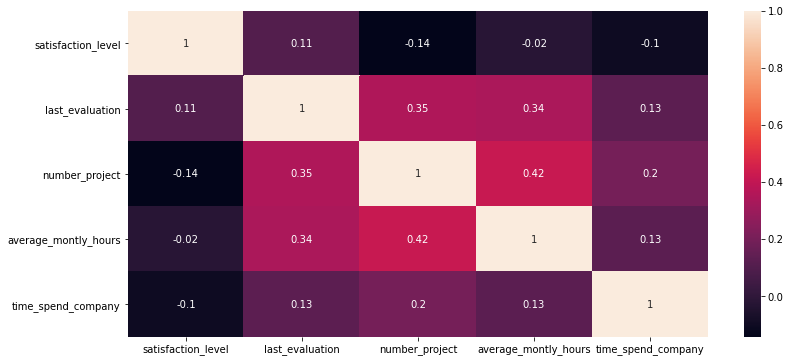

In [7]:
sns.heatmap(df.corr(), annot=True)

Больше всего кореллируют между собой number_project и average_montly_hours. Больше проектов дали -- больше работаешь, ожидаемо

Меньше всего коррелируют last_evaluation и satisfaction_level, так же satisfaction_level и time_spend_company

# Задание 4. Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [8]:
# left == 0 - так как нужно выяснить сколько работает сейчас

df[df.left == 0].groupby(['department']).count()['satisfaction_level']

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: satisfaction_level, dtype: int64

# Задание 5. Показать распределение сотрудников по зарплатам.

<AxesSubplot:xlabel='salary'>

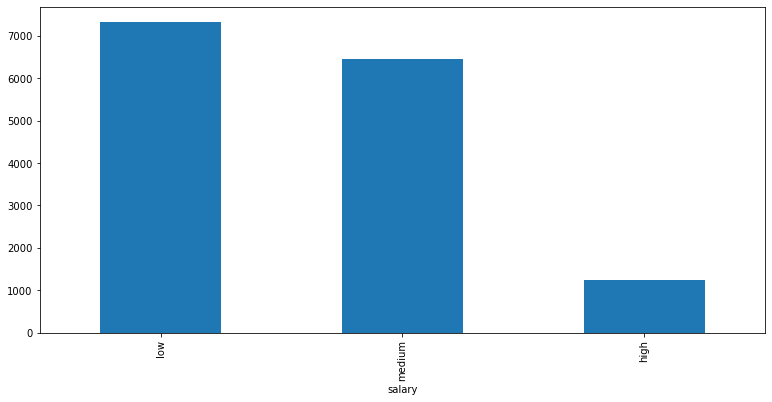

In [9]:
# включая уволенных
df.groupby(['salary']).count()['satisfaction_level'].plot(kind='bar')

# Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [10]:
df_2 = df[['department', 'salary', 'satisfaction_level']].pivot_table(
                        index='department', 
                        columns='salary', 
                        values='satisfaction_level', 
                        aggfunc='count')

df_2

salary,low,medium,high
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


<AxesSubplot:xlabel='department'>

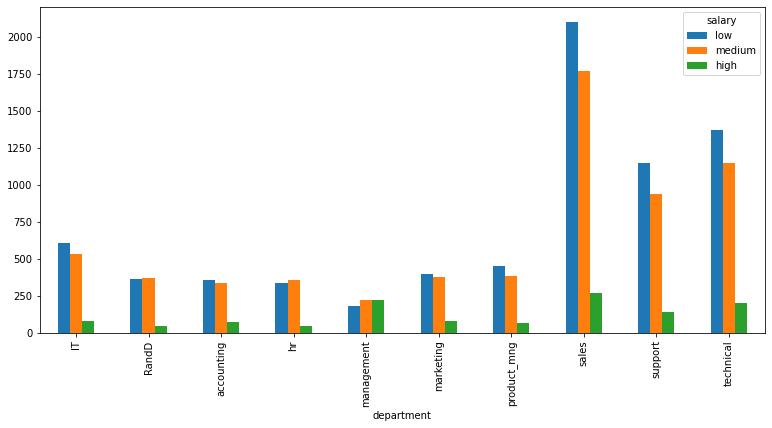

In [11]:
df_2.plot(kind='bar')

# Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

**Нулевая гипотеза** сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

**Альтернативная гипотеза** время которое сотрудник проводит на работе не связано с окладом

In [12]:
df[['average_montly_hours', 'salary']].head(10)

,average_montly_hours,salary
0,157,low
1,262,medium
2,272,medium
3,223,low
4,159,low
5,153,low
6,247,low
7,259,low
8,224,low
9,142,low


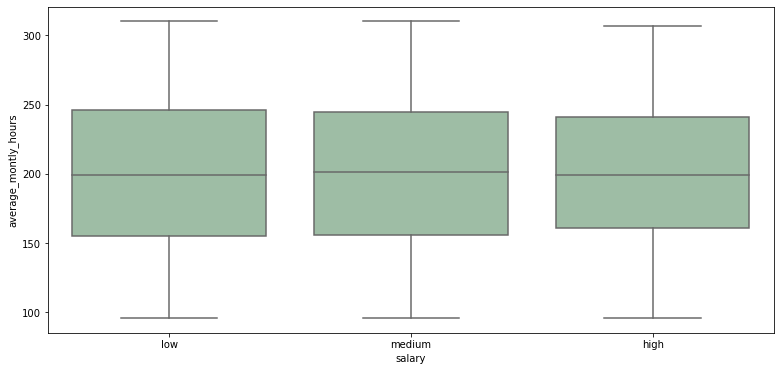

In [13]:
ax = sns.boxplot(x='salary', y='average_montly_hours', data=df, color='#99c2a2')
plt.show()

In [14]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df[df.salary == 'low']['average_montly_hours'],
                                df[df.salary == 'medium']['average_montly_hours'],
                                df[df.salary == 'high']['average_montly_hours'])

print(fvalue, pvalue)

0.4583624407867663 0.6323271153144614


По графику и по pvalue видно, что нулевую гипотезу можно отвергнуть, то есть, время которое сотрудник проводит на работе не связано с окладом

# Задание 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [15]:
def print_report(dataframe):
    promoted = dataframe['promotion_last_5years'].value_counts(normalize=True)[1]
    
    print(f"Доля сотрудников с повышением за последние 5 лет: {promoted:0.2f}")
    print(f"Средняя степень удовлетворенности: {dataframe['satisfaction_level'].mean():0.2f}")
    print(f"Среднее количество проектов: {dataframe['number_project'].mean():0.2f}")

print("Показатели среди уволившихся сотрудников")
print_report(df[df.left == 0])

print("\n\n")

print("Показатели среди неуволившихся сотрудников")
print_report(df[df.left == 1])

Показатели среди уволившихся сотрудников
Доля сотрудников с повышением за последние 5 лет: 0.03
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79



Показатели среди неуволившихся сотрудников
Доля сотрудников с повышением за последние 5 лет: 0.01
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86


# Задание 9

Разделить данные на тестовую и обучающую выборки.

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [17]:
x = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [19]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [20]:
lda.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(x_test))

0.7557777777777778

Доля верно спрогнозированных равна ~75%